<a href="https://colab.research.google.com/github/dofus08/dofus-sandbox/blob/master/1_1_StepByStep_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab environment already has nltk
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# -*- coding: utf-8 -*-
"""
TA Workshop : Text preparation step by step
"""

import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords


In [3]:
#load required data for NLTK 
## Note: on local machine, you just need to run it once only using "nltk.download()"
##       at the 'NLTK Downloader' dialogue window, choose 'book', then click 'Download'

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Or open the JSON data file from your current working directory
data =  open("Article_1.json", "r")

In [5]:
# Load in the JSON object in the file
jdata = json.load(data)
jdata.keys()

dict_keys(['URL', 'Text', '_id'])

In [6]:
# Take a look at the values in the JSON object
print(jdata['URL'])
print(jdata['Text'])
print(jdata['_id'])

http://www.slate.com/articles/life/food/2015/08/i_was_gluten_free_before_it_was_cool_diagnosed_with_celiac_in_the_1990s.html
Gluten, it turns out, is not an actual grain or visible ingredient but the substance, made of two proteins, that gives dough its elasticity. Celiac is an autoimmune disorder in which gluten wreaks havoc on the small intestine, blocking other nutrients from being absorbed. When I was diagnosed with celiac, my doctor taught me to pinpoint wheaty assassins lurking in foods you’d never suspect: soy sauce, gravy, candy bars. Back then, the crunchiest health food store in my hometown was the only place where you could find wheat-free products. My mom and I would go there to eat terrible sandwiches in a tiny café in the back that was decorated like a ’70s rainforest, beaded curtains strung alongside fake agave plants. It was always empty. The wild-haired store owner would emerge from the kitchen with her hands full of rolls.

As someone who once mail-ordered a frozen pa

In [7]:
text=jdata['Text']
print(type(text))
print(len(text))
print(text[:20])

<class 'str'>
9336
Gluten, it turns out


In [8]:
# Convert the free text into tokens
tokens = word_tokenize(text)
type(tokens)

list

In [9]:
# A little exploration: How many tokens are there in this article? 
print(len(tokens))
tokens[:30]

1855


['Gluten',
 ',',
 'it',
 'turns',
 'out',
 ',',
 'is',
 'not',
 'an',
 'actual',
 'grain',
 'or',
 'visible',
 'ingredient',
 'but',
 'the',
 'substance',
 ',',
 'made',
 'of',
 'two',
 'proteins',
 ',',
 'that',
 'gives',
 'dough',
 'its',
 'elasticity',
 '.',
 'Celiac']

In [10]:
#How many unique words?
unique = set(tokens)
print("No. of unique tokens: ", len(unique))
print("Average frequency of tokens: ", len(tokens)/len(unique))
sorted(unique)[:30]

No. of unique tokens:  815
Average frequency of tokens:  2.276073619631902


['(',
 ')',
 ',',
 '.',
 '/',
 '100',
 '140',
 '1995',
 '2',
 '2012',
 '2013',
 '2014',
 '2019',
 '59',
 '60',
 '70s',
 '9',
 '9-year-old',
 '9-year-olds',
 ':',
 ';',
 '?',
 'A',
 'After',
 'All',
 'Along',
 'Also',
 'America',
 'American',
 'And']

In [12]:
# Any single character words?
single=[w for w in unique if len(w) == 1 ]
print("No. of single character tokens: ", len(single))
single

No. of single character tokens:  20


[';',
 's',
 'd',
 't',
 ',',
 '2',
 '/',
 '(',
 'I',
 '”',
 ')',
 '“',
 '?',
 'm',
 '.',
 ':',
 'A',
 '9',
 'a',
 '’']

In [16]:
# the frequency of a single token
tokens.count('Gluten')

5

[('.', 76), (',', 75), ('the', 65), ('a', 58), ('of', 47), ('to', 39), ('I', 37), ('in', 29), ('and', 28), ('my', 25), ('’', 23), ('“', 23), ('”', 23), ('gluten', 18), ('was', 18), ('that', 17), ('it', 16), ('with', 13), ('you', 13), ('from', 10), ('me', 10), ('like', 10), ('as', 10), ('had', 10), ('your', 10), ('when', 9), ('s', 9), ('at', 9), ('food', 8), ('?', 8), ('by', 8), ('is', 7), ('an', 7), ('for', 7), ('or', 6), ('on', 6), ('gluten-free', 6), ('this', 6), ('into', 6), ('t', 6), ('Gluten', 5), (':', 5), ('would', 5), ('The', 5), ('one', 5), ('more', 5), ('percent', 5), ('A', 5), ('so', 5), ('they', 5)]


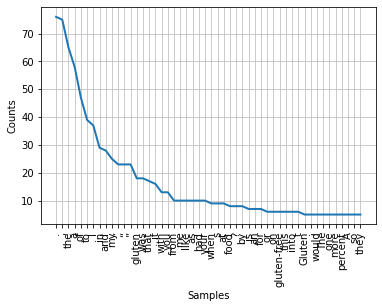

In [17]:
# Frequency distribution of the tokens

fd = nltk.FreqDist(tokens)
print(fd.most_common(50))
fd.plot(50)

In [18]:
# More explorations: how long are the words?
fd_wlen = nltk.FreqDist([len(w) for w in unique])
sorted(fd_wlen.items())

[(1, 20),
 (2, 38),
 (3, 79),
 (4, 133),
 (5, 120),
 (6, 110),
 (7, 98),
 (8, 69),
 (9, 49),
 (10, 37),
 (11, 28),
 (12, 12),
 (13, 12),
 (14, 6),
 (15, 1),
 (16, 1),
 (20, 1),
 (21, 1)]

In [19]:
# What about bigrams and trigrams?
bigr = nltk.bigrams(tokens[:10])
trigr = nltk.trigrams(tokens[:10])
tokens[:10]

['Gluten', ',', 'it', 'turns', 'out', ',', 'is', 'not', 'an', 'actual']

In [20]:
list(bigr)

[('Gluten', ','),
 (',', 'it'),
 ('it', 'turns'),
 ('turns', 'out'),
 ('out', ','),
 (',', 'is'),
 ('is', 'not'),
 ('not', 'an'),
 ('an', 'actual')]

In [21]:
list(trigr)

[('Gluten', ',', 'it'),
 (',', 'it', 'turns'),
 ('it', 'turns', 'out'),
 ('turns', 'out', ','),
 ('out', ',', 'is'),
 (',', 'is', 'not'),
 ('is', 'not', 'an'),
 ('not', 'an', 'actual')]

In [22]:
# Now let's perform text preprocessing: 
# remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation ]
print("Before punctuation removal: ", tokens[:50])
print("After punctuation removal: ", tokens_nop[:50])
print("No. of tokens (before punc removal): ", len(tokens))
print("No. of tokens (after punc removal): ", len(tokens_nop))
print("No. of unique tokens after punc removal: ", len(set(tokens_nop)))

Before punctuation removal:  ['Gluten', ',', 'it', 'turns', 'out', ',', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', ',', 'made', 'of', 'two', 'proteins', ',', 'that', 'gives', 'dough', 'its', 'elasticity', '.', 'Celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', ',', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed']
After punctuation removal:  ['Gluten', 'it', 'turns', 'out', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', 'made', 'of', 'two', 'proteins', 'that', 'gives', 'dough', 'its', 'elasticity', 'Celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed', 'When', 'I', 'was', 'diagnosed', 'with', 'celiac']
No. of tokens (before punc removal):  1855
No. of tokens (after 

In [26]:
# Convert all characters to lower case
tokens_lower=[ t.lower() for t in tokens_nop ]
print(tokens_lower[:50])
len(set(tokens_lower))

['gluten', 'it', 'turns', 'out', 'is', 'not', 'an', 'actual', 'grain', 'or', 'visible', 'ingredient', 'but', 'the', 'substance', 'made', 'of', 'two', 'proteins', 'that', 'gives', 'dough', 'its', 'elasticity', 'celiac', 'is', 'an', 'autoimmune', 'disorder', 'in', 'which', 'gluten', 'wreaks', 'havoc', 'on', 'the', 'small', 'intestine', 'blocking', 'other', 'nutrients', 'from', 'being', 'absorbed', 'when', 'i', 'was', 'diagnosed', 'with', 'celiac']


770

In [24]:
# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')
print(stop)
len(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [25]:
# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]
print(tokens_nostop[:50])
print("No. of tokens(before stopword removal): ", len(tokens_lower))
print("No. of tokens(after stopword removal): ", len(tokens_nostop))

['gluten', 'turns', 'actual', 'grain', 'visible', 'ingredient', 'substance', 'made', 'two', 'proteins', 'gives', 'dough', 'elasticity', 'celiac', 'autoimmune', 'disorder', 'gluten', 'wreaks', 'havoc', 'small', 'intestine', 'blocking', 'nutrients', 'absorbed', 'diagnosed', 'celiac', 'doctor', 'taught', 'pinpoint', 'wheaty', 'assassins', 'lurking', 'foods', '’', 'never', 'suspect', 'soy', 'sauce', 'gravy', 'candy', 'bars', 'back', 'crunchiest', 'health', 'food', 'store', 'hometown', 'place', 'could', 'find']
No. of tokens(before stopword removal):  1681
No. of tokens(after stopword removal):  926


In [27]:
# And remove the numbers
tokens_nonum = [ t for t in tokens_nostop if not t.isnumeric() ]
print("No. of tokens(after number removal): ", len(tokens_nonum))

No. of tokens(after number removal):  912


In [28]:
#now let's check the most common words again
FreqDist(tokens_nonum).most_common(50)
#What do you observe from the result? what would you do? Hint:"’“”"

[('gluten', 23),
 ('’', 23),
 ('“', 23),
 ('”', 23),
 ('like', 10),
 ('food', 8),
 ('gluten-free', 7),
 ('celiac', 5),
 ('would', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('way', 4),
 ('asked', 4),
 ('maybe', 4),
 ('made', 3),
 ('small', 3),
 ('doctor', 3),
 ('never', 3),
 ('could', 3),
 ('mom', 3),
 ('tiny', 3),
 ('also', 3),
 ('wheat', 3),
 ('allergies', 3),
 ('years', 3),
 ('much', 3),
 ('waiters', 3),
 ('still', 3),
 ('something', 3),
 ('two', 2),
 ('gives', 2),
 ('diagnosed', 2),
 ('sauce', 2),
 ('back', 2),
 ('health', 2),
 ('store', 2),
 ('find', 2),
 ('products', 2),
 ('kitchen', 2),
 ('found', 2),
 ('went', 2),
 ('feeling', 2),
 ('saying', 2),
 ('comes', 2),
 ('shoppers', 2),
 ('buy', 2)]

In [29]:
# you can add these tokens to the punctuation list and stopword list above
# e.g. 
# tokens_nop = [ t for t in tokens if t not in string.punctuation+"’“”" ]
# stop = stopwords.words('english')+["would", "could"]
# Or do a cleanup here
filter_list = [ "’", "“", "”","would", "could", ]
tokens_clean = [ t for t in tokens_nonum if t not in filter_list ]
FreqDist(tokens_clean).most_common(50)

[('gluten', 23),
 ('like', 10),
 ('food', 8),
 ('gluten-free', 7),
 ('celiac', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('way', 4),
 ('asked', 4),
 ('maybe', 4),
 ('made', 3),
 ('small', 3),
 ('doctor', 3),
 ('never', 3),
 ('mom', 3),
 ('tiny', 3),
 ('also', 3),
 ('wheat', 3),
 ('allergies', 3),
 ('years', 3),
 ('much', 3),
 ('waiters', 3),
 ('still', 3),
 ('something', 3),
 ('two', 2),
 ('gives', 2),
 ('diagnosed', 2),
 ('sauce', 2),
 ('back', 2),
 ('health', 2),
 ('store', 2),
 ('find', 2),
 ('products', 2),
 ('kitchen', 2),
 ('found', 2),
 ('went', 2),
 ('feeling', 2),
 ('saying', 2),
 ('comes', 2),
 ('shoppers', 2),
 ('buy', 2),
 ('disease', 2),
 ('decades', 2),
 ('become', 2),
 ('started', 2),
 ('whether', 2)]

In [30]:
# Now, let's do some Stemming!
# There are different stemmers available in Python. Let's take a look at a few

# The most popular stemmer
porter = nltk.PorterStemmer()
tokens_porter=[ porter.stem(t) for t in tokens_clean ] 
#print("Before stemming: ", tokens_clean[:30])
#print("After stemming(Porter): ", tokens_porter[:30])
for t0, t1 in zip(tokens_clean[:20], tokens_porter[:20]):
    print("{:15s}{:15s}".format(t0, t1))

gluten         gluten         
turns          turn           
actual         actual         
grain          grain          
visible        visibl         
ingredient     ingredi        
substance      substanc       
made           made           
two            two            
proteins       protein        
gives          give           
dough          dough          
elasticity     elast          
celiac         celiac         
autoimmune     autoimmun      
disorder       disord         
gluten         gluten         
wreaks         wreak          
havoc          havoc          
small          small          


In [31]:
# The Lancaster Stemmer - developed at Lancaster University
# What do you think about the results?
lancaster = nltk.LancasterStemmer()
tokens_lanc = [ lancaster.stem(t) for t in tokens_clean ] 
for t0, t1 in zip(tokens_clean[:20], tokens_lanc[:20]):
    print("{:15s}{:15s}".format(t0, t1))

gluten         glut           
turns          turn           
actual         act            
grain          grain          
visible        vis            
ingredient     ingredy        
substance      subst          
made           mad            
two            two            
proteins       protein        
gives          giv            
dough          dough          
elasticity     elast          
celiac         celiac         
autoimmune     autoimmun      
disorder       disord         
gluten         glut           
wreaks         wreak          
havoc          havoc          
small          smal           


In [32]:
# The snowball stemmer -  which supports 13 non-English languages as well!

snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_clean ]
for t0, t1 in zip(tokens_clean[:20], tokens_snow[:20]):
    print("{:15s}{:15s}".format(t0, t1))


gluten         gluten         
turns          turn           
actual         actual         
grain          grain          
visible        visibl         
ingredient     ingredi        
substance      substanc       
made           made           
two            two            
proteins       protein        
gives          give           
dough          dough          
elasticity     elast          
celiac         celiac         
autoimmune     autoimmun      
disorder       disord         
gluten         gluten         
wreaks         wreak          
havoc          havoc          
small          small          


In [34]:
len(set(tokens_snow))

611

In [36]:
# Now, for Lemmatization, which converts each word to it's corresponding lemma, use the Lemmatizer provided by nltk
nltk.download('omw-1.4')
wnl = nltk.WordNetLemmatizer()
tokens_lem = [ wnl.lemmatize(t) for t in tokens_clean ]
for t0, t1 in zip(tokens_clean[:20], tokens_lem[:20]):
    print("{:15s}{:15s}".format(t0, t1))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


gluten         gluten         
turns          turn           
actual         actual         
grain          grain          
visible        visible        
ingredient     ingredient     
substance      substance      
made           made           
two            two            
proteins       protein        
gives          give           
dough          dough          
elasticity     elasticity     
celiac         celiac         
autoimmune     autoimmune     
disorder       disorder       
gluten         gluten         
wreaks         wreaks         
havoc          havoc          
small          small          


In [37]:
# Check the lemmatization results. Why are some words not lemmatized?
# The reason is it needs to know the POS of the words. The default is 'n'.
# We'll learn how to do POS tagging later.
print(wnl.lemmatize('absorbed', pos = 'v'))
print(wnl.lemmatize('better', pos = 'a'))

absorb
good


In [38]:
# Let's use Snowball Stemmer's result for now.
fd_snow = nltk.FreqDist(tokens_snow)
fd_snow.most_common(20)

[('gluten', 23),
 ('like', 10),
 ('food', 9),
 ('gluten-fre', 7),
 ('ask', 6),
 ('celiac', 5),
 ('one', 5),
 ('percent', 5),
 ('first', 5),
 ('way', 5),
 ('allergi', 5),
 ('waiter', 5),
 ('eat', 4),
 ('heard', 4),
 ('word', 4),
 ('year', 4),
 ('mayb', 4),
 ('turn', 3),
 ('ingredi', 3),
 ('made', 3)]

In [43]:
# Colab environment already has wordcloud package
#!pip install wordcloud

In [41]:
#if you have not installed matplotlib, pandas, please also install them
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

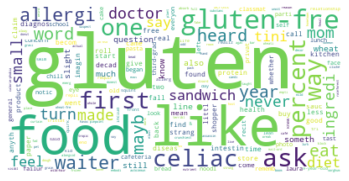

In [42]:
# 1. Generate word cloud from the frequency information
wc_fd = WordCloud(background_color="white")
wc_fd.generate_from_frequencies(fd_snow)
plt.imshow(wc_fd, interpolation='bilinear')
plt.axis("off")
plt.show()

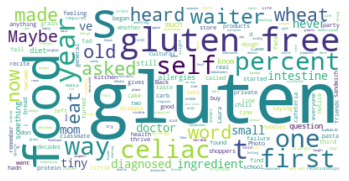

In [44]:
# 2. Generate word cloud from text string, using WordCloud's default processing 

wc_original = WordCloud(background_color="white").generate(text)

plt.imshow(wc_original, interpolation='bilinear')
plt.axis("off")
plt.show()